In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MEDV'] = california.target

In [11]:
X = data[['MedInc']].values
y = data['MEDV'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test_poly)

In [16]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6982964744960334


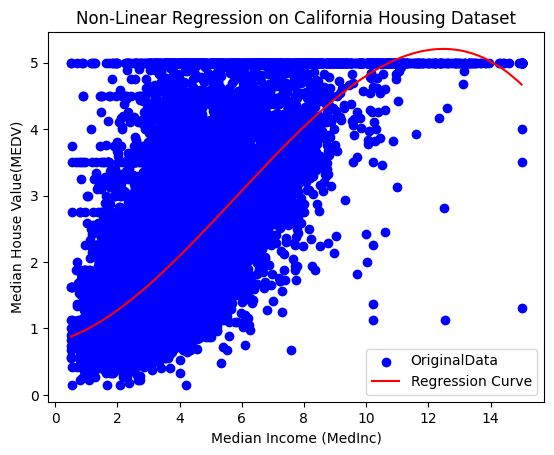

In [17]:
plt.scatter(X, y, color='blue', label='OriginalData')
sorted_indices = np.argsort(X_train.flatten())
plt.plot(X_train.flatten()[sorted_indices], model.predict(X_train_poly)[sorted_indices],color='red',label='Regression Curve')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value(MEDV)')
plt.title('Non-Linear Regression on California Housing Dataset')
plt.legend()
plt.show()